In [ ]:
# Import necessary Libraries
from skimage.metrics import structural_similarity # Helps in finding structural similarity score between og image and tampered image
import imutils #Acquiring contours of image
import cv2 #Image processing requirements
from PIL import Image
import requests #Used to fetch data from URLs

This notebook compares two UK driving licenses as a test

In [ ]:
# Create directories to store images
!mkdir UK_license_tampering
!mkdir UK_license_tampering/image

mkdir: cannot create directory ‘UK_license_tampering’: File exists
mkdir: cannot create directory ‘UK_license_tampering/image’: File exists


In [ ]:
# Open image and display
original = Image.open(requests.get('https://upload.wikimedia.org/wikipedia/commons/9/92/UK_full_licence_dec_2021.jpg', stream =True).raw)
fake = Image.open(requests.get('https://i.pinimg.com/736x/b0/ea/22/b0ea2270af7e2e678036420fbfe1bfd8.jpg', stream = True).raw)

**Checking file format and image sizes**

In [ ]:
# File Formats
print("Original image format: ",original.format)
print("Tampered image format: ",fake.format)

#Image size, in pixels, given as 2-tuple (width, height)
print("Original image size: ", original.size)
print("Tampered image size: ", fake.size)

Original image format:  JPEG
Tampered image format:  JPEG
Original image size:  (326, 204)
Tampered image size:  (735, 491)


**Making the image formats similar**

In [ ]:
# Resize Image
original = original.resize((325,204)) #Resizing to width of 325 and height of 204
print(original.size)
original.save('UK_license_tampering/image/original.png') #Saving original image as png
fake = fake.resize((325,204))
print(fake.size)
fake.save('UK_license_tampering/image/fake.png') #Saves fake image as png

(325, 204)
(325, 204)


**Visualise images**

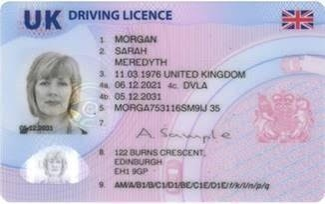

In [ ]:
original

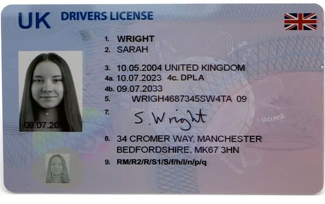

In [ ]:
fake

**Load images using CV2**

In [ ]:
# Load the two input images
original = cv2.imread('UK_license_tampering/image/original.png')
fake = cv2.imread('UK_license_tampering/image/fake.png')

**Reading images using opencv**

To proceed, we would have to convert the images into greyscale as it is easier to observe and outline edges and other features due to the presence of one channel.

In [ ]:
# Convert the images to greyscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
fake_gray = cv2.cvtColor(fake, cv2.COLOR_BGR2GRAY)

**Finding the structural similarities**

The Structural Similarity index helps determine the image differences in terms of x,y coordinate locations. The lower the SSIM, the more similar the images are.

In [ ]:
# Compute the Structural Similarity Index (SSIM) between the two images
(score, diff) = structural_similarity(original_gray, fake_gray, full = True) # Pass both images through the SSIM function
diff = (diff * 255).astype("uint8") # Multiply by 255 to normalise
print("SSIM : {}".format(score)) # Print SSIM score

SSIM : 0.3175028993633524


**Finding threshold and contours**

The threshold function of computer vision applies an adaptice threshold to the image which is stored in form of an array.

The function transforms the grayscale image into a binary image using a mathematical formula.

Contours, which are effective for shape analysis and recognition, are then identified and retrieved.

In [ ]:
# Calculating threshold and contours
thresh = cv2.threshold(diff,0,255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU) [1] # Applies thresholding to greyscale image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # Identifies and extracts contours from binary image
cnts = imutils.grab_contours(cnts)

**Create bounding rectangle for the images**

Bounding rectangles help in finding the width to height ratio of the object.

It is computed for the contour and then drawn on both input images to highlight the differences of the images.

In [ ]:
# loop over contours

for c in cnts:
  #applying contours on image
 (x, y, w, h) = cv2.boundingRect(c)
 cv2.rectangle(original, (x,y), (x + w, y + h),(0,0,255),2) #Bounding rectangle for original image
 cv2.rectangle(fake, (x,y), (x + w, y + h),(0, 255), 2) #Bounding rectangle for fake image

**Display images with contours**

Original Format Image


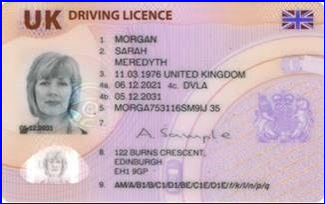

In [ ]:
#Display original image with contour
print('Original Format Image')
Image.fromarray(original)

Fake Image


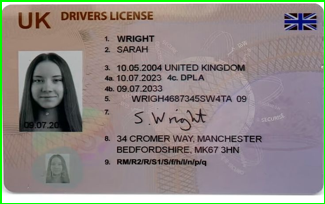

In [ ]:
#Display fake image with contour
print('Fake Image')
Image.fromarray(fake)

Different Image


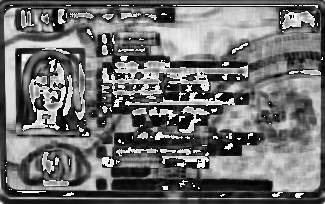

In [ ]:
#Display difference with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


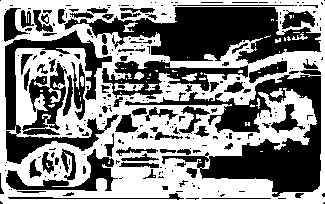

In [ ]:
# Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)

**Summary**


Sample Test: SSIM is about ~31.7% hence the image that the user provided is fake.


